<a href="https://colab.research.google.com/github/nick-leland/rd2l_pred/blob/main/random_forest_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RD2L Prediction

The goal of this notebook is to train a model to predict player costs based on different factors.  We utilize the OpenDota API, then perform feature engineering on the information to create our database.  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("all_info.csv", header=0, index_col=0).transpose()
data.drop(columns="player_id", inplace=True)

In [ ]:
data

,cost,mmr,p1,p2,p3,p4,p5,count,mean,std,...,games_129,winrate_129,games_135,winrate_135,games_136,winrate_136,games_137,winrate_137,games_138,winrate_138
260316741_S25,305.0,6580.0,3.0,3.0,5.0,2.0,2.0,20.0,500.000000,55.654006,...,93.0,0.483871,71.0,0.436620,16.0,0.500000,16.0,0.250000,1.0,0.000000
126042590_S25,240.0,6430.0,1.0,1.0,1.0,1.0,1.0,20.0,500.000000,55.654006,...,7.0,0.428571,2.0,0.000000,16.0,0.562500,12.0,0.416667,1.0,1.000000
456063778_S25,305.0,6070.0,3.0,3.0,3.0,3.0,1.0,20.0,500.000000,55.654006,...,78.0,0.602564,12.0,0.416667,18.0,0.555556,23.0,0.565217,18.0,0.333333
130527149_S25,186.0,5870.0,1.0,1.0,1.0,3.0,5.0,20.0,500.000000,55.654006,...,7.0,0.714286,21.0,0.476190,26.0,0.538462,3.0,0.000000,4.0,0.500000
83514255_S25,300.0,5850.0,1.0,5.0,1.0,1.0,1.0,20.0,500.000000,55.654006,...,69.0,0.652174,52.0,0.596154,53.0,0.679245,61.0,0.737705,29.0,0.758621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24521769_S31,23.0,3076.0,5.0,1.0,4.0,4.0,4.0,9.0,504.444444,65.314836,...,5.0,0.200000,10.0,0.700000,13.0,0.384615,1.0,0.000000,6.0,0.666667
123919855_S31,0.0,2800.0,1.0,1.0,1.0,1.0,1.0,9.0,504.444444,65.314836,...,2.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
118563219_S31,10.0,2560.0,1.0,1.0,1.0,3.0,5.0,9.0,504.444444,65.314836,...,4.0,0.500000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
110119494_S31,0.0,2137.0,1.0,1.0,3.0,3.0,3.0,9.0,504.444444,65.314836,...,36.0,0.416667,9.0,0.666667,8.0,0.250000,1.0,1.000000,2.0,1.000000


Our target variable here is cost.  Before continuing with our data we should evaluate the data for any null values and remove those players from our sheet.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429 entries, 260316741_S25 to 519770_S31
Columns: 263 entries, cost to winrate_138
dtypes: float64(263)
memory usage: 884.8+ KB


In [ ]:
print(data.shape)
print((data.dropna()).shape)

(429, 263)
(427, 263)


Here, there are only two players that have incomplete information, in this case we will just remove these.

In [ ]:
data.dropna(inplace=True)

Now we will begin our data evaluation by splitting the data into four different instances, training and testing data.  We will train the model on one set and evaluate the model on another set of data.  

In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(['cost'], axis=1)
y = data['cost']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Test size can be adjusted, by default a good value to leave it at is 20%.

In [ ]:
train_data = x_train.join(y_train)

In [ ]:
train_data

,mmr,p1,p2,p3,p4,p5,count,mean,std,min,...,winrate_129,games_135,winrate_135,games_136,winrate_136,games_137,winrate_137,games_138,winrate_138,cost
177129466_S28,4210.0,2.0,1.0,2.0,4.0,5.0,16.0,462.250000,122.689581,171.0,...,0.258065,57.0,0.456140,1.0,0.000000,10.0,0.400000,1.0,0.000000,100.0
130927010_S25,2360.0,1.0,1.0,1.0,3.0,5.0,20.0,500.000000,55.654006,375.0,...,0.200000,21.0,0.428571,0.0,0.000000,0.0,0.000000,0.0,0.000000,17.0
89377233_S26,3690.0,5.0,1.0,1.0,1.0,1.0,20.0,492.450000,93.438680,322.0,...,0.400000,12.0,0.166667,3.0,0.000000,4.0,0.750000,28.0,0.607143,46.0
127264062_S26,4480.0,5.0,1.0,1.0,1.0,1.0,20.0,492.450000,93.438680,322.0,...,0.500000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,87.0
26595816_S27,4640.0,3.0,2.0,1.0,1.0,1.0,16.0,446.562500,119.344302,204.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332242377_S25,4030.0,3.0,3.0,2.0,5.0,2.0,20.0,500.000000,55.654006,375.0,...,0.555556,18.0,0.666667,16.0,0.500000,14.0,0.714286,3.0,0.666667,69.0
100579655_S29,2999.0,3.0,5.0,5.0,2.0,2.0,18.0,450.111111,81.504160,287.0,...,0.457143,7.0,0.714286,0.0,0.000000,6.0,0.333333,2.0,0.000000,70.0
209043408_S29,3545.0,2.0,1.0,3.0,1.0,3.0,18.0,450.111111,81.504160,287.0,...,0.000000,0.0,0.000000,0.0,0.000000,5.0,0.800000,1.0,0.000000,50.0
64041417_S27,3210.0,1.0,2.0,3.0,5.0,5.0,16.0,446.562500,119.344302,204.0,...,0.000000,17.0,0.588235,20.0,0.450000,21.0,0.523810,7.0,0.000000,53.0


If we were to use this data for visualization, we would quickly lose the data due to the amount of values in the individual hero game count and winrate.  We will create another dataset for visualization purposes to avoid this problem.

In [ ]:
visual = train_data.loc[:, ['mmr', 'p1', 'p2', 'p3', 'p4', 'p5', 'count', 'mean', 'std', 'min', 'max', 'sum', 'total_games_played', 'total_winrate', 'cost']]
visual

,mmr,p1,p2,p3,p4,p5,count,mean,std,min,max,sum,total_games_played,total_winrate,cost
177129466_S28,4210.0,2.0,1.0,2.0,4.0,5.0,16.0,462.250000,122.689581,171.0,620.0,7396.0,3450.0,0.499420,100.0
130927010_S25,2360.0,1.0,1.0,1.0,3.0,5.0,20.0,500.000000,55.654006,375.0,580.0,10000.0,3659.0,0.508609,17.0
89377233_S26,3690.0,5.0,1.0,1.0,1.0,1.0,20.0,492.450000,93.438680,322.0,623.0,9849.0,4201.0,0.528208,46.0
127264062_S26,4480.0,5.0,1.0,1.0,1.0,1.0,20.0,492.450000,93.438680,322.0,623.0,9849.0,10287.0,0.523476,87.0
26595816_S27,4640.0,3.0,2.0,1.0,1.0,1.0,16.0,446.562500,119.344302,204.0,620.0,7145.0,5473.0,0.695962,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332242377_S25,4030.0,3.0,3.0,2.0,5.0,2.0,20.0,500.000000,55.654006,375.0,580.0,10000.0,5180.0,0.519498,69.0
100579655_S29,2999.0,3.0,5.0,5.0,2.0,2.0,18.0,450.111111,81.504160,287.0,557.0,8102.0,2326.0,0.563199,70.0
209043408_S29,3545.0,2.0,1.0,3.0,1.0,3.0,18.0,450.111111,81.504160,287.0,557.0,8102.0,1516.0,0.561346,50.0
64041417_S27,3210.0,1.0,2.0,3.0,5.0,5.0,16.0,446.562500,119.344302,204.0,620.0,7145.0,9087.0,0.609442,53.0


array([[<Axes: title={'center': 'mmr'}>, <Axes: title={'center': 'p1'}>,
        <Axes: title={'center': 'p2'}>, <Axes: title={'center': 'p3'}>],
       [<Axes: title={'center': 'p4'}>, <Axes: title={'center': 'p5'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'mean'}>],
       [<Axes: title={'center': 'std'}>, <Axes: title={'center': 'min'}>,
        <Axes: title={'center': 'max'}>, <Axes: title={'center': 'sum'}>],
       [<Axes: title={'center': 'total_games_played'}>,
        <Axes: title={'center': 'total_winrate'}>,
        <Axes: title={'center': 'cost'}>, <Axes: >]], dtype=object)

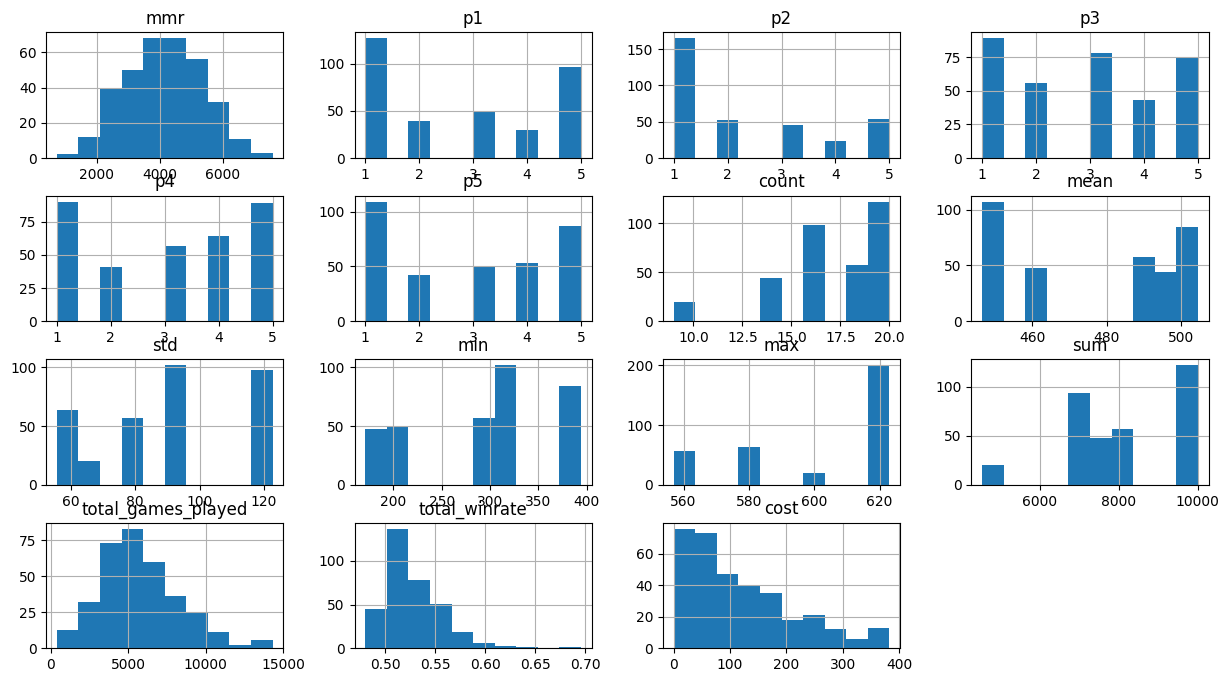

In [ ]:
visual.hist(figsize=(15,8))

<Axes: >

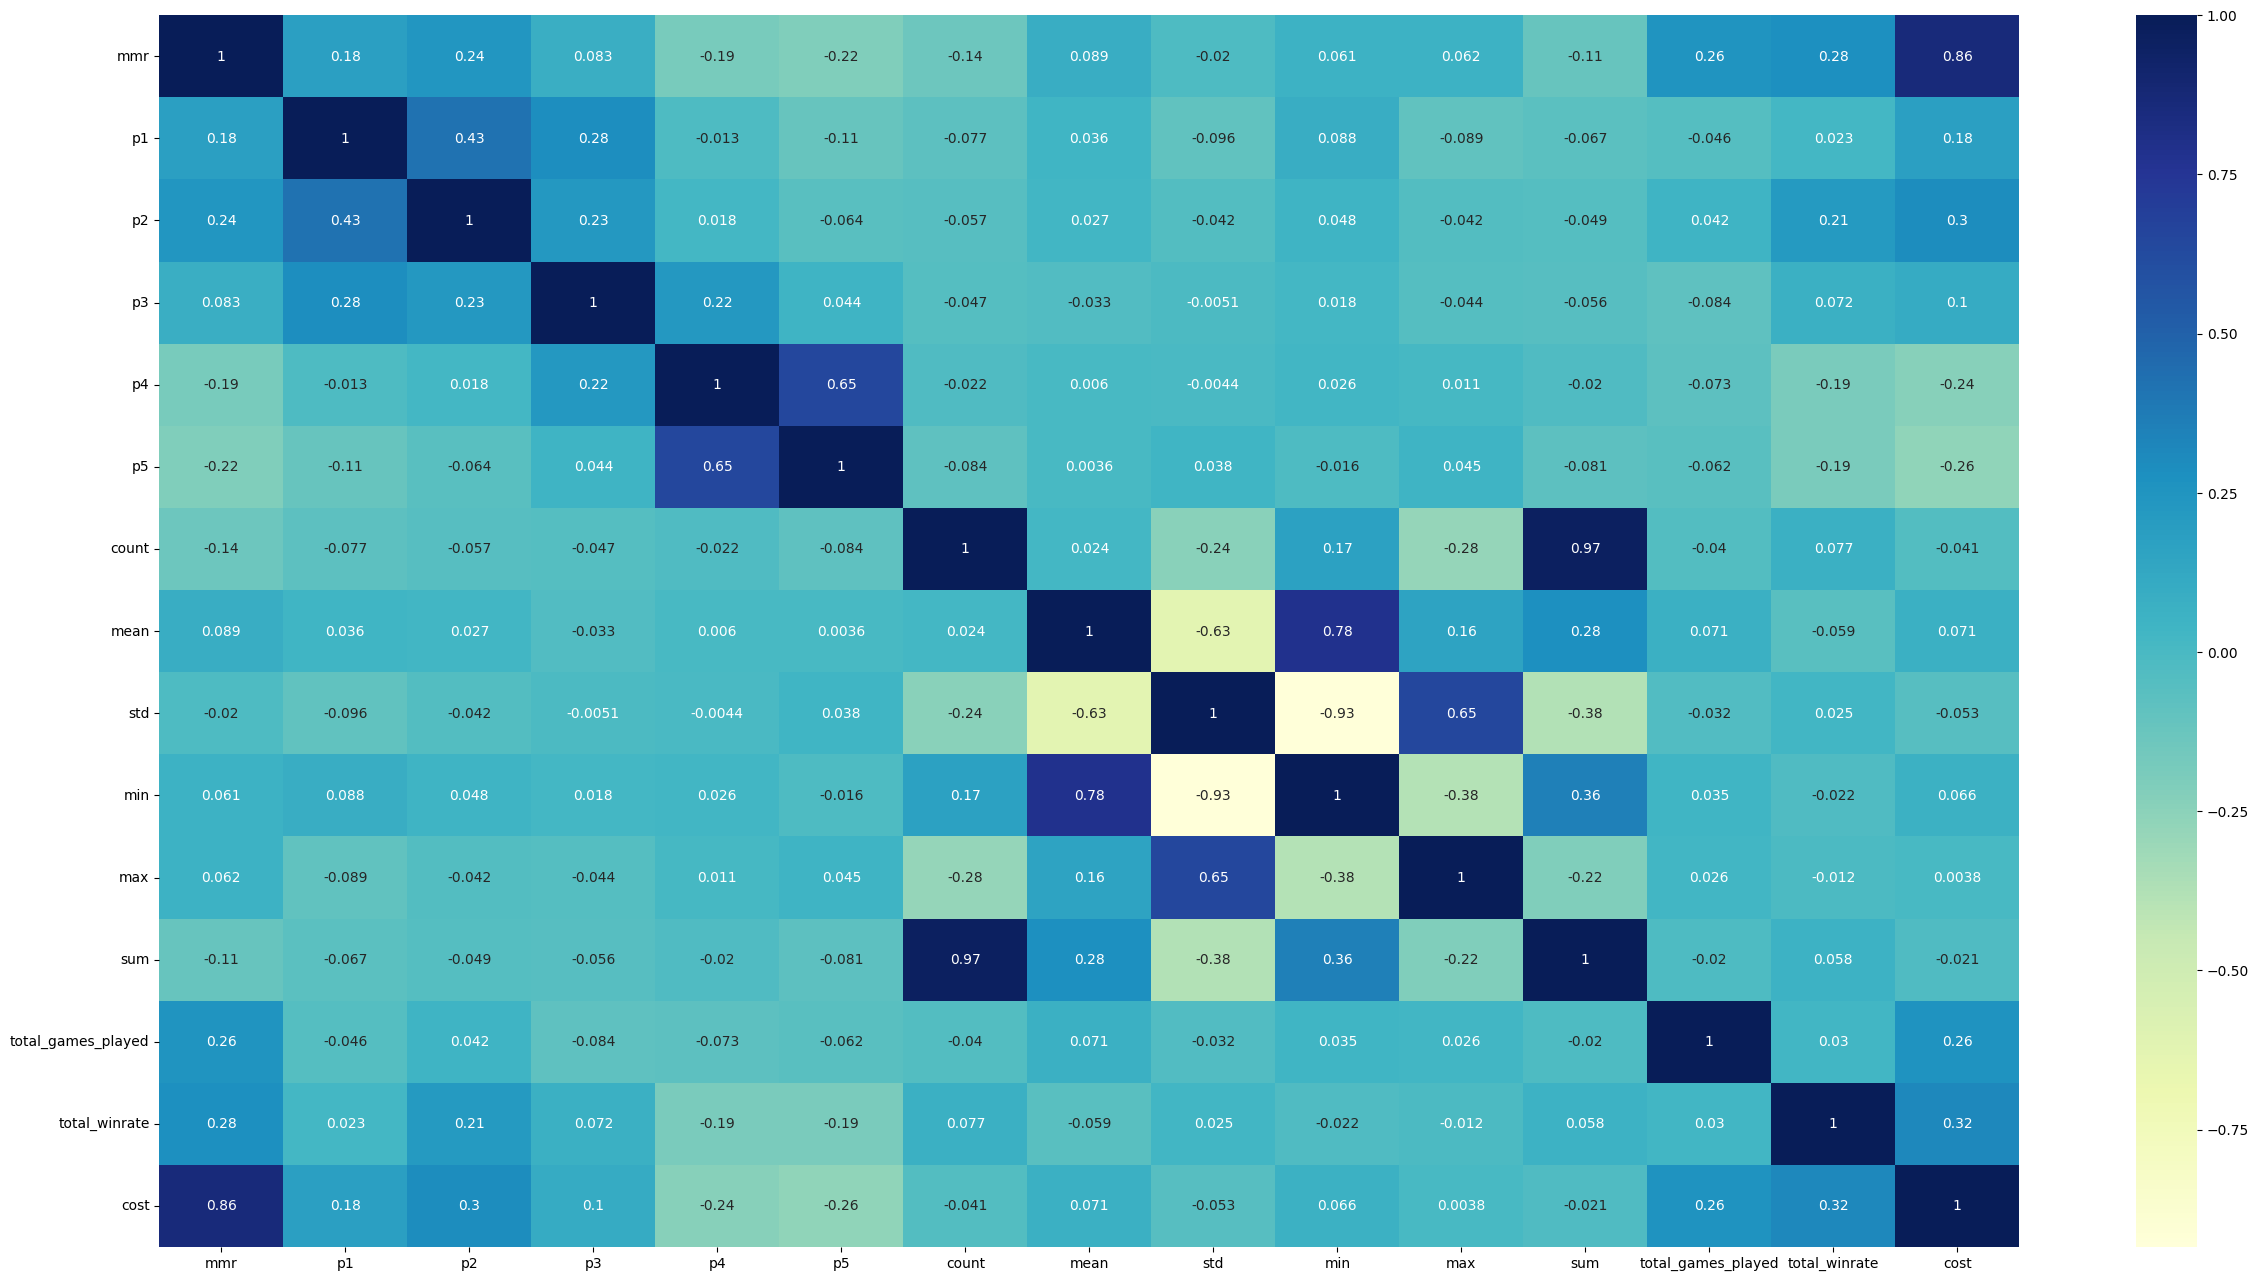

In [ ]:
plt.figure(figsize=(30,16))
sns.heatmap(visual.corr(), annot=True, cmap="YlGnBu")

Overall, the data that we gathered is relatively centered.  Without looking too much into the individual hero statistics (Which might be worth exploring at a later point), all that we need to adjust is the 'total_winrate'.  You can see a comparison of the graphs below, orange being before adjustment and blue after.

<Axes: >

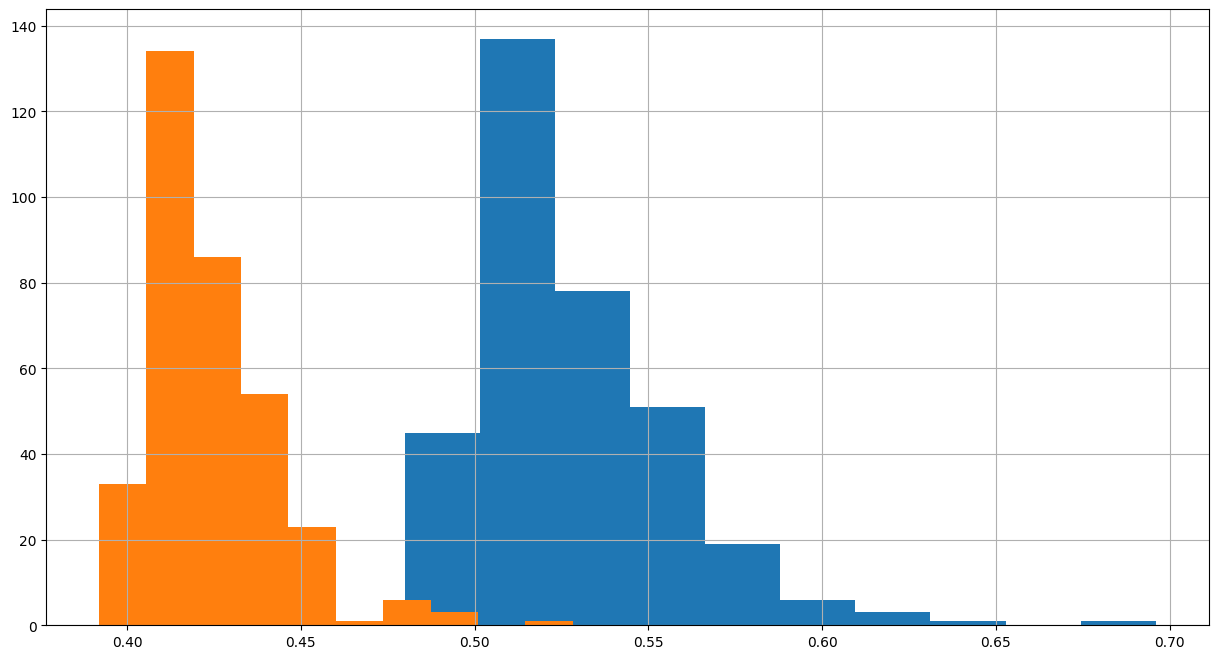

In [ ]:
visual.loc[:, 'total_winrate'].hist(figsize=(15,8))
train_data['total_winrate'] = np.log(train_data['total_winrate'] + 1)
train_data.loc[:, 'total_winrate'].hist(figsize=(15,8))

We will now begin exploring training and utilizing different models for the purpose of cost prediciton.  The first model that we will be exploring is a simple linear regression model.  Unfortunately due to the time constraints of this project we may be limited to only using this model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['cost'], axis=1), train_data['cost']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [ ]:
test_data = x_test.join(y_test)
test_data['total_winrate'] = np.log(test_data['total_winrate'] + 1)
x_test, y_test = test_data.drop(['cost'], axis=1), test_data['cost']

In [ ]:
x_test_s = scaler.transform(x_test)

In [ ]:
reg.score(x_test_s, y_test)

-1.8442296843135362e+23

This is unfortunately a very low score.  We will have to pursue another method.  

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(x_test, y_test)

0.8176927500022413

In [ ]:
pred_data = pd.read_csv("prediction_data.csv", header=0, index_col=0).transpose()
pred_data.drop(columns=["player_id", "cost"], inplace=True)

In [ ]:
pred_data

,mmr,p1,p2,p3,p4,p5,count,mean,std,min,...,games_129,winrate_129,games_135,winrate_135,games_136,winrate_136,games_137,winrate_137,games_138,winrate_138
1203364439_S32,6730.0,2.0,2.0,3.0,5.0,5.0,14.0,451.428571,81.422653,321.0,...,12.0,0.250000,108.0,0.555556,54.0,0.481481,6.0,0.500000,13.0,0.692308
83514255_S32,6500.0,1.0,5.0,1.0,1.0,1.0,14.0,451.428571,81.422653,321.0,...,69.0,0.652174,52.0,0.596154,53.0,0.679245,61.0,0.737705,29.0,0.758621
37544998_S32,6301.0,2.0,2.0,2.0,5.0,5.0,14.0,451.428571,81.422653,321.0,...,51.0,0.607843,37.0,0.648649,11.0,0.363636,10.0,0.600000,44.0,0.568182
92001890_S32,6249.0,4.0,5.0,4.0,2.0,2.0,14.0,451.428571,81.422653,321.0,...,1.0,0.000000,0.0,0.000000,12.0,0.416667,0.0,0.000000,0.0,0.000000
119541084_S32,5914.0,4.0,5.0,1.0,2.0,2.0,14.0,451.428571,81.422653,321.0,...,4.0,0.250000,6.0,0.333333,12.0,0.666667,11.0,0.727273,0.0,0.000000
188649776_S32,5759.0,5.0,3.0,3.0,1.0,1.0,14.0,451.428571,81.422653,321.0,...,51.0,0.294118,35.0,0.685714,28.0,0.392857,29.0,0.586207,37.0,0.459459
99929152_S32,5728.0,2.0,5.0,5.0,1.0,1.0,14.0,451.428571,81.422653,321.0,...,116.0,0.525862,46.0,0.695652,17.0,0.470588,51.0,0.549020,4.0,0.500000
171871486_S32,5700.0,2.0,2.0,3.0,5.0,5.0,14.0,451.428571,81.422653,321.0,...,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
172199571_S32,5653.0,5.0,5.0,5.0,5.0,5.0,14.0,451.428571,81.422653,321.0,...,8.0,0.375000,8.0,0.625000,30.0,0.400000,4.0,0.000000,1.0,0.000000
101960024_S32,5615.0,3.0,1.0,3.0,1.0,3.0,14.0,451.428571,81.422653,321.0,...,13.0,0.461538,1.0,0.000000,24.0,0.500000,8.0,0.750000,1.0,0.000000


In [ ]:
predictions = forest.predict(pred_data)

In [ ]:
pred_data['Predicted_Cost'] = predictions
pred_data

,mmr,p1,p2,p3,p4,p5,count,mean,std,min,...,winrate_129,games_135,winrate_135,games_136,winrate_136,games_137,winrate_137,games_138,winrate_138,Predicted_Cost
1203364439_S32,6730.0,2.0,2.0,3.0,5.0,5.0,14.0,451.428571,81.422653,321.0,...,0.250000,108.0,0.555556,54.0,0.481481,6.0,0.500000,13.0,0.692308,267.87
83514255_S32,6500.0,1.0,5.0,1.0,1.0,1.0,14.0,451.428571,81.422653,321.0,...,0.652174,52.0,0.596154,53.0,0.679245,61.0,0.737705,29.0,0.758621,341.52
37544998_S32,6301.0,2.0,2.0,2.0,5.0,5.0,14.0,451.428571,81.422653,321.0,...,0.607843,37.0,0.648649,11.0,0.363636,10.0,0.600000,44.0,0.568182,287.97
92001890_S32,6249.0,4.0,5.0,4.0,2.0,2.0,14.0,451.428571,81.422653,321.0,...,0.000000,0.0,0.000000,12.0,0.416667,0.0,0.000000,0.0,0.000000,281.33
119541084_S32,5914.0,4.0,5.0,1.0,2.0,2.0,14.0,451.428571,81.422653,321.0,...,0.250000,6.0,0.333333,12.0,0.666667,11.0,0.727273,0.0,0.000000,303.76
188649776_S32,5759.0,5.0,3.0,3.0,1.0,1.0,14.0,451.428571,81.422653,321.0,...,0.294118,35.0,0.685714,28.0,0.392857,29.0,0.586207,37.0,0.459459,279.51
99929152_S32,5728.0,2.0,5.0,5.0,1.0,1.0,14.0,451.428571,81.422653,321.0,...,0.525862,46.0,0.695652,17.0,0.470588,51.0,0.549020,4.0,0.500000,295.16
171871486_S32,5700.0,2.0,2.0,3.0,5.0,5.0,14.0,451.428571,81.422653,321.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,187.92
172199571_S32,5653.0,5.0,5.0,5.0,5.0,5.0,14.0,451.428571,81.422653,321.0,...,0.375000,8.0,0.625000,30.0,0.400000,4.0,0.000000,1.0,0.000000,188.79
101960024_S32,5615.0,3.0,1.0,3.0,1.0,3.0,14.0,451.428571,81.422653,321.0,...,0.461538,1.0,0.000000,24.0,0.500000,8.0,0.750000,1.0,0.000000,168.58


In [ ]:
final = pred_data[['Predicted_Cost', 'mmr', 'p1', 'p2', 'p3', 'p4', 'p5']]
final.to_csv("results")


In [ ]:
print(final)

,Predicted_Cost,mmr,p1,p2,p3,p4,p5
1203364439_S32,267.87,6730.0,2.0,2.0,3.0,5.0,5.0
83514255_S32,341.52,6500.0,1.0,5.0,1.0,1.0,1.0
37544998_S32,287.97,6301.0,2.0,2.0,2.0,5.0,5.0
92001890_S32,281.33,6249.0,4.0,5.0,4.0,2.0,2.0
119541084_S32,303.76,5914.0,4.0,5.0,1.0,2.0,2.0
188649776_S32,279.51,5759.0,5.0,3.0,3.0,1.0,1.0
99929152_S32,295.16,5728.0,2.0,5.0,5.0,1.0,1.0
171871486_S32,187.92,5700.0,2.0,2.0,3.0,5.0,5.0
172199571_S32,188.79,5653.0,5.0,5.0,5.0,5.0,5.0
101960024_S32,168.58,5615.0,3.0,1.0,3.0,1.0,3.0
